Natural Language Processing, or NLP, is a field at the intersection of computer science, artificial intelligence, and linguistics. Its goal is to enable computers to understand, interpret, generate, and respond to human language in a valuable way. This understanding could range from simple tasks (like identifying the language of the text) to complex ones (like sentiment analysis, machine translation, and summarization).

# What will you gain from this assignment?

* **Practical Skills**: You'll gain hands-on experience working with text data — the largest data type in the world today

* **Analytical Thinking**: You'll learn how to approach language as a data scientist, breaking down sentences into tokens, extracting meaningful features, and turning text into data that machines can understand

* **Understanding of Core Concepts**: NLP is built on key principles of linguistics, computer science, and machine learning. Through this assignment, you'll get a sneak-peek into these fascinating areas

* **Tool Familiarity**: This assignment will familiarize you with essential libraries for NLP. These tools are widely used in academia and industry, making this knowledge incredibly transferable

# Note

Both the test and the Jupiter notebook are required parts of this assignment


# Setup
Run the following code cells for the correct execution of the code. Also it will connect your Google Drive with the temporary storage connected with this nothebook

In [33]:
!pip install nltk
!pip install pandas
!pip install gensim
!pip install wordcloud
!pip install matplotlib
!pip install transformers

In [2]:

import nltk
import string
import random
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import wordnet
from wordcloud import WordCloud
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.tokenize import sent_tokenize
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BartTokenizer, BartForConditionalGeneration, pipeline

warnings.filterwarnings('ignore')
nltk.download('wordnet')
nltk.download('punkt')

/Users/liuyucheng/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/liuyucheng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liuyucheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Upload text.txt to Colab and check if path to the file is correct:

In [4]:
data_path = "/Users/liuyucheng/Desktop/Introduction_to_Computational_Thinking_and_Data_Science/Dataset/Ivanhoe.txt"
with open(data_path, 'r') as f:
    lines = f.readlines()
    for i in range(min(10, len(lines))):
        print(lines[i].strip())

The Project Gutenberg eBook of Ivanhoe: A Romance

This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.



If you see the following text...



> ﻿The Project Gutenberg eBook of Ivanhoe: A Romance\
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

... then everything is correct!

Run the last cell before you will be ready to solve some real NLP problems!

In [5]:
def read_document(path):
    with open(path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

text = read_document(data_path)

# Tasks

## Task 1 (7 points)
Textual data can often be overwhelming due to its volume and complexity. Visualization techniques, such as generating a word cloud, provide a quick and insightful way to understand the essential features of a text document. It is a powerful tool for exploratory data analysis, summarizing large chunks of text data in a visually appealing and interpretable manner

Run the following code cell to understand how word cloud looks like

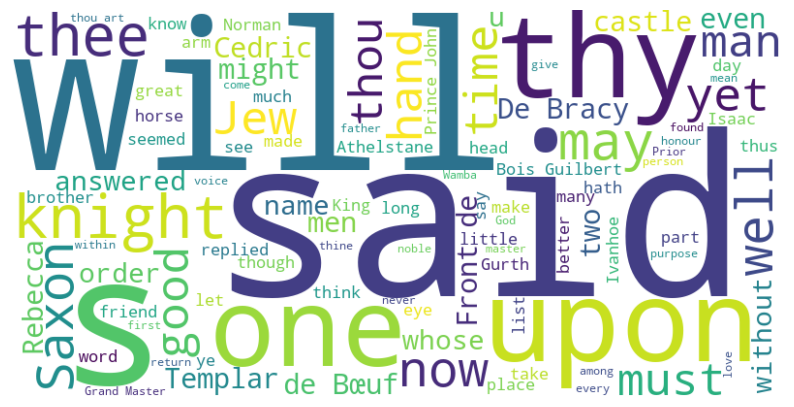

In [37]:
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, max_words = 100, contour_width = 3, contour_color = 'steelblue')
wordcloud.generate(text)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.show()

**Question 1**: You've just generated and seen a word cloud based on the text document. Now, let's delve into what a word cloud represents and your impressions of this particular one. In your own words, explain what a word cloud is and what it is commonly used for.

**Answer** : In my point of view, the word clou means the frequency of the word. The bigger the word in the picture, the more frequently the qord shows in the text. As far as I am concerned, this technology is usually uased in text analysis. For example, when we are going to analyze the theme in a book or passage, we can use this technology to find the top mostly words showing in the passage. We can more easily to catch the main idea and theme of a passage. In this  picture, it is the word of 'said' and 'will' leave the most impression with me. It reflects the one of the features of email. In the email, we usualy use the past tense and future tense in the email.

## Task 2 (7 points)
Understanding the frequency distribution of words in a document provides key insights into its thematic focus and content. It can serve as a rudimentary form of text summarization and aids in grasping the essence of the document.

This task is particularly important because word frequency counts are often a starting point for more advanced NLP techniques, such as text classification, clustering, or topic modeling

Output the first 10 frequent words from the text

In [38]:
words = text.split()
word_counts = {}

N = 10

for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

sorted_word_counts = sorted(word_counts.items(), key = lambda x: x[1], reverse = True)[ : N]

print("The  most frequent words are:")
for word, freq in sorted_word_counts:
    print(f"{word}: {freq}")


The  most frequent words are:
the: 12942
of: 8129
and: 5632
to: 5421
a: 3544
in: 2751
his: 2619
with: 1817
as: 1670
that: 1666


The result is pretty surprising, isn't it?

The word cloud automatically filters out "stop words" like *the*, *a*, *in*, and so on. These are common words that appear frequently in almost all text but are usually considered to be of little value in text analysis because they don’t carry significant meaning. Therefore, the word cloud focuses on displaying the more "interesting" or unique words in the text.

On the other hand, when we count word frequencies manually without filtering out these stop words, they naturally rise to the top as the most frequent words. So don't worry if the two don't match; it's all about what is being filtered out!

**Question 2**: Given that the most frequent words are often stop words that might not carry much individual meaning, what other methods could we use to better understand the thematic content of the text? How might we modify our approach to get a clearer picture of the document's main topics or sentiments?

**Answer:**: In my opinion, the word like 'on' and 'an' are also a kind of stop words without any specific meanings. There are several methods to filter the stop wods out of the list. On the one hand, we can build up a word list in the program. When we are goin to analyze the text, if program find the word in the list, it can just ignore it. There are many pulished stop word lists online to download. Besides, you can use TF-IDF[1] algorithm to filter the stop words out of the text. 

Reference:
[1] https://en.wikipedia.org/wiki/Tf%E2%80%93idf

## Task 3 (7 points)
In previous tasks, we focused on visualizing and identifying the most frequent words in the text. Now let's shift our focus to a single, specific word. Your task is to find all occurrences of a  word *Ivanhoe* in the text

In [39]:
words = text.split()
target_word = 'Ivanhoe' # YOUR CODE
target_word_frequency = 0
for word in words:
    if word == target_word:
        target_word_frequency += 1

print(f"The word '{target_word}' appears {target_word_frequency} times in the text.")


The word 'Ivanhoe' appears 55 times in the text.


**Question 3**: Now that you know how many times the word *Ivanhoe* appears in the text, what might be the significance or role of this character in the story? How does the frequency of this word correlate with its importance in the text? Would you expect this word to appear more or less frequently, and why?

**answer:** I suppose that the more frequently this role showing up in this text, the more important this role is. Since, a role who frequently shoing in the role may have more chances to influence the development of the story. The higher frequency usually means the role may more likely to be the main role in this story. We need to more consider the sentences or words about him when doing the analysis. The frequency of this name depends on different tasks. If we need to do the analysis about this character, we hope this role shows up as more as possible so that we have more materials to analyze. If it is the analysis about a=other characters, I don't think it is great for this character to show up for too many times since If the name of this character appears too frequently, it will interfere with our analysis of the text.

## Task 4 (7 points)
Text data is inherently categorical and must be converted into numerical format to be utilized by machine learning algorithms. One simple yet powerful method to achieve this is binary vectorization. In this task, you will get hands-on experience with this concept, which will lay the groundwork for more complex natural language processing tasks you'll encounter later.

Convert a set of sentences into binary vectors using Python. Each position in the vector corresponds to a unique word in the vocabulary created from the selected sentences. A position in the vector will be marked as 1 if the corresponding word is present in the sentence, and 0 otherwise.

**Your task is to fill the gaps in the code cell with proper values**

In [40]:
sentences_all = text.split('. ')

random_sentences = random.sample(sentences_all, 10)
for i in range(len(random_sentences)):
  print("\nSENTENCE # ", i, ",", random_sentences[i], "\n")

vocabulary = set()
# Tokenize sentences and build vocabulary
tokenized_sentences = []
for sentence in random_sentences:
    words = sentence.lower().split()
    tokenized_sentences.append(words)
    for word in words:
        vocabulary.add(word) # REPLACE ___ WITH YOUR CODE

vocabulary_list = list(vocabulary)

for sentence in tokenized_sentences:
    for vocab_word in vocabulary_list:
        print(vocab_word)

# Create binary vectors
binary_vectors = []
for sentence in tokenized_sentences:
    vec = []
    for vocab_word in vocabulary_list:
        if vocab_word in sentence:
            vec.append(1) # REPLACE ___ WITH YOUR CODE
        else:
            vec.append(0) # REPLACE ___ WITH YOUR CODE
    binary_vectors.append(vec)

print("Binary Vectors:")
for vec in binary_vectors:
    print(vec)



SENTENCE #  0 , I am more intent on punishing that villain Abbot.
He shall hang on the top of this Castle of Coningsburgh, in his cope
and stole; and if the stairs be too strait to admit his fat carcass, I
will have him craned up from without.”

“But, my son,” said Edith, “consider his sacred office.”

“Consider my three days’ fast,” replied Athelstane; “I will have their
blood every one of them 


SENTENCE #  1 , But why, oh why, noble Prince, will you thus vex
the hearts of your faithful servants, and expose your life by lonely
journeys and rash adventures, as if it were of no more value than that
of a mere knight-errant, who has no interest on earth but what lance
and sword may procure him?”

“And Richard Plantagenet,” said the King, “desires no more fame than
his good lance and sword may acquire him—and Richard Plantagenet is
prouder of achieving an adventure, with only his good sword, and his
good arm to speed, than if he led to battle a host of an hundred
thousand armed men.”

“

Astonishing result, isn't it? But let's be sure that everything is clear:


In the given output, each `SENTENCE # X` line represents one of the 10 randomly selected sentences from the original text. Following each sentence is its corresponding binary vector, which is a list of zeros and ones. The length of each binary vector is equal to the total number of unique words in the vocabulary built from the 10 sentences.

Each position in the binary vector corresponds to a specific word in the vocabulary list. The value at that position will be '1' if that specific word appears in the sentence, and '0' otherwise.

Here's a simplified example to illustrate:

1. Let's say the vocabulary has only four unique words: `["apple", "orange", "banana", "grape"]`.
2. And you have a sentence: `I like apple and banana`.
3. The binary vector for this sentence would be `[1, 0, 1, 0]`.
* The first position corresponds to `apple`, which is in the sentence, so the first value is `1`.
* The second position corresponds to `orange`, which is not in the sentence, so the second value is `0`.
* The third position corresponds to `banana`, which is in the sentence, so the third value is `1`.
* The fourth position corresponds to `grape`, which is not in the sentence, so the fourth value is `0`.


This binary representation is a very basic form of text vectorization, and it allows you to translate textual information into a format that machine learning algorithms can understand. It's a starting point for many more complex methods in natural language processing.

**Question 4**:
What information is lost when we represent sentences as binary vectors?
Can you think of a real-world application where binary vectorization would be particularly useful?

**Answer:**: As far as I am concerned, the temperal information are lost in the seentence vectorization. It means that we cannot get the order of the words. we cannot know which word shows up first and which word shows second. We only know that which word shows up in this sentence. Besides, time of showing up is also lost since if a vocabulary shows up twice in the sentence, the vectorized data will only illustrate the word shows up in this sentence, but we don't knoe how many times the word shows up. Besides, it has a lot of computation cost and use a lot of memory to storage and compute the vector.

There are many senario that this algorithm can be used. For example, we are able to apply this algorithm in the retievel tasks so that when we are going to find the key word in the text, it will be easier. 

## Task 5 (7 points)


 Word2Vec is a more advanced technique that represents each word in a continuous vector space. This method captures semantic relationships between words, unlike simple binary vectorization, which simply shows the presence or absence of a word in a sentence


 So, in simple words, we match each word with its numerical value, which indicates its proximity to all other words words

In [41]:
sentences = text.lower().translate(str.maketrans('', '', string.punctuation)).split('.')
tokenized_sentences = [sentence.split() for sentence in sentences]

vector_size = 100  # Dimensionality of the word vectors. You can change this and see what happens
window_size = 5

word2vec_model = Word2Vec(sentences = tokenized_sentences, vector_size = vector_size, window = window_size, sg = 0, min_count = 1)

word2vec_model.train(tokenized_sentences, total_examples = len(tokenized_sentences), epochs=10)

# Find the vector representation for specific words
specific_words = ['ivanhoe', 'cedric']
for word in specific_words:
    try:
        vector = word2vec_model.wv[word]
        print(f"The vector representation for the word '{word}' is {vector}")
    except KeyError:
        print(f"The word '{word}' does not exist in the vocabulary.")

# Find the most similar words to a specific word
try:
    similar_words = word2vec_model.wv.most_similar('ivanhoe', topn=5)
    print(f"The most similar words to 'ivanhoe' are: {similar_words}")
except KeyError:
    print("The word 'ivanhoe' does not exist in the vocabulary.")


The vector representation for the word 'ivanhoe' is [-0.2643725   0.11630445  0.09571383  0.4648072   0.10598736 -0.28989583
  0.34283152  0.69921976 -0.17512834 -0.4588505  -0.03199127 -0.5645581
  0.33445367  0.15859395 -0.11392275 -0.14727412  0.22653812 -0.2739206
 -0.29033983 -0.7211193   0.00345606  0.02429905  0.30712196 -0.1358171
  0.02908894 -0.03336852 -0.2569404  -0.06147575 -0.01772118 -0.01230178
  0.30185294 -0.3090063   0.08367046 -0.27269012 -0.06884061  0.48905656
  0.32561332 -0.18804917 -0.09022114 -0.48168546  0.16176187 -0.18921836
 -0.3307375   0.00366054  0.43951365 -0.13611576 -0.22531329 -0.17508073
  0.23828214  0.1434455  -0.07219192 -0.20450899 -0.09017924  0.02495505
 -0.06891233 -0.0961592   0.3507908  -0.10487615  0.01441604  0.21581583
 -0.22138269 -0.17085604  0.13846418 -0.10771231 -0.20674925  0.41106966
  0.16794243  0.20932359 -0.3141187   0.40275985 -0.0187368   0.2866025
  0.3805522  -0.0863899   0.48730206 -0.16541998  0.19281414 -0.05114263
 -0

You see that vector representation of the word is as big as binary vectorization of the whole sentence! However, with bigger dimensional comes bigger precision: in natural language processing, representing words as vectors in a high-dimensional space is a common technique to capture semantic and syntactic information about the words. When we say that the vector representation for a word is "big," we usually refer to the number of dimensions the vector has.

The more dimensions you have, the easier it is to distinguish between words. When you have a large vocabulary, being able to separate words distinctly in the vector space is crucial for tasks like classification, clustering, or similarity measurement.

**Now it is your turn to find the most similar word to the word** *knight*

In [42]:
word = 'knight' # YOUR CODE
try:
    similar_words = word2vec_model.wv.most_similar(word, topn=5)
    print(f"The most similar words to 'knight' are: {similar_words}")
except KeyError:
    print("The word 'knight' does not exist in the vocabulary.")


The most similar words to 'knight' are: [('newly', 0.3899497389793396), ('pale', 0.3827079236507416), ('pavement”', 0.37549522519111633), ('jugglers', 0.3536728322505951), ('heaven', 0.3529618978500366)]


**Question 5**: What are the benefits and limitations of using a high-dimensional space for word vectors?

**Answer:** 
Benifits: There aseveral benifits in NLP field to use the high-dimensional spcae for word vector. On the one hand, encoding the word into high dimensional vector is able to enhance the reprensatation of the model. As a result, the model may have the higher performance in the tasks. Besides, there will be less over lapping between each words in the encoding.

Limitations: Encoding the word into high dimensional vectors may cause a lot of computational cost during the computation. The higher number of dimension also make the model easier to be over fitting.

## Task 6 (7 points)



The task of finding synonyms and antonyms in text is crucial for several reasons, spanning various fields like natural language processing, linguistics, and even cognitive science.

The identification of synonyms and antonyms is not merely a lexical exercise but a task that holds significant implications for both machine and human understanding of language. It is a foundational task in NLP and continues to be an area of active research and application.

**Your task is to find synonyms and antonyms of the word** *happy*

In [43]:
text = text.lower().translate(str.maketrans('', '', string.punctuation))
sentences = text.split('.')
tokenized_sentences = [sentence.split() for sentence in sentences]

model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1)

def find_antonyms_by_negation(model, target_word, topn=10):
    try:
        neg_vector = -model.wv[target_word]
        similar_to_neg = model.wv.similar_by_vector(neg_vector, topn=topn)
        return similar_to_neg
    except KeyError:
        return f"{target_word} is not in vocabulary"

target_word = "happy"
try:
    similar_words = model.wv.most_similar(target_word, topn=10)
    print(f"Synonyms to word '{target_word}' in the context of the text: {similar_words}")
except KeyError:
    print(f"'{target_word}' is not in vocabulary")

similar_to_neg = find_antonyms_by_negation(model, target_word)
print(f"Antonyms to word '{target_word}' in the context of the text: {similar_to_neg}")


Synonyms to word 'happy' in the context of the text: [('wealthy', 0.43914794921875), ('ventured', 0.418487548828125), ('“wamba', 0.3840603530406952), ('landscape', 0.3736926317214966), ('hostile', 0.3642038404941559), ('voice', 0.36224544048309326), ('invented', 0.36121198534965515), ('mouldered', 0.35701826214790344), ('scene', 0.35492852330207825), ('natural', 0.3531250059604645)]
Antonyms to word 'happy' in the context of the text: [('blew', 0.40592625737190247), ('chimney—his', 0.3750070035457611), ('iron', 0.3697652816772461), ('sparkling', 0.3452267348766327), ('astonish’d', 0.34012579917907715), ('down—he', 0.3383086621761322), ('undenied', 0.33183708786964417), ('endeaver', 0.32978299260139465), ('wars”', 0.325703889131546), ('prior’s', 0.317865788936615)]


The concepts of synonyms and antonyms are not as straightforward as they may appear because language is deeply context-dependent. Words that are synonyms or antonyms in one context may not hold the same relationship in another setting.

Because of these complexities, it's crucial to consider context when identifying synonyms and antonyms. In some cases, they can be tagged as such only within the specific text being analyzed.

**Question 6:** How would you handle words that have multiple meanings in the task of identifying synonyms and antonyms?

**Answer:** From my opinion, I suppose that concern the context words of the target word is important. For instance, we can infer a meaning/feature of a word according to 5 words around it. Considering the background of the word is able to get more accurate meaning of the target word.

## Task 7 (9 points)

Summarization aims to reduce the content to its most essential points, delivering the same message but in a more concise manner. This is particularly useful for quickly understanding large volumes of text or identifying the most important information within a document.

In this task, you'll focus on summarizing a randomly selected sentence from a given text.

In [44]:
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
summarizer = pipeline("summarization", model = model, tokenizer=tokenizer)

In [46]:
text = read_document(data_path)
sentences = text.split('. ')
sentences = [s.strip() for s in sentences if s]

random_sentence = random.choice([s for s in sentences if len(s) >= 30])
summary = summarizer(random_sentence, max_length = 50, min_length = 5, do_sample = False)

print("Original Sentence:", random_sentence)
print("Summary:", summary[0]['summary_text'])

Original Sentence: He therefore gently insinuated the incapacity of the native
of any other country to engage in the genial conflict of the bowl with
the hardy and strong-headed Saxons; something he mentioned, but
slightly, about his own holy character, and ended by pressing his
proposal to depart to repose.

The grace-cup was accordingly served round, and the guests, after
making deep obeisance to their landlord and to the Lady Rowena, arose
and mingled in the hall, while the heads of the family, by separate
doors, retired with their attendants.

“Unbelieving dog,” said the Templar to Isaac the Jew, as he passed him
in the throng, “dost thou bend thy course to the tournament?”

“I do so propose,” replied Isaac, bowing in all humility, “if it please
your reverend valour.”

“Ay,” said the Knight, “to gnaw the bowels of our nobles with usury,
and to gull women and boys with gauds and toys—I warrant thee store of
shekels in thy Jewish scrip.”

“Not a shekel, not a silver penny, not a half

**Question 7:** How well did the machine-generated summary capture the essence of the original text? What important details were omitted in the machine summary? What improvements would you suggest for the current summarization model?

**Answer:** The machine can summarize that the peoaple being described in this sentence is a clown and what is the clown doing in the sentence. However, the machine failed to point out that the expression of the countenance is also a cue to let us know he is a clown. I suppose that the model catch only one reason to infer he as aclown. We may concern that using a mechanism to capture the details in the sentences.

## Bonus task (bonus 10 points)

The goal is to build a simple sentiment analyzer that categorizes the sentences from your original text as either 'positive' or 'negative'.

**Description:**

1. **Feature Extraction**: Utilize one of the vectorization techniques you've previously learned to turn your sentences into numerical data. This could be binary representation or Word2Vec.

3. **Model Training**: Use a straightforward machine learning model like Naive Bayes to train on this small dataset.

4. **Prediction**: Use the model to predict the sentiment of remaining sentences in the text. Display the sentences along with their predicted sentiments.

In [25]:
sentences = sent_tokenize(text)

# Randomly select 1000 sentences for training
train_sentences = choices(sentences, k=1000) # YOUR CODE HERE

labels = [random.choice([0, 1]) for _ in range(len(train_sentences))]

# Feature extraction
vectorizer = CountVectorizer() # YOUR CODE HERE
X_train = vectorizer.fit_transform(train_sentences)# YOUR CODE HERE



You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org.
4630
1000


In [11]:
sentences = sent_tokenize(text)

# Randomly select 1000 sentences for training
train_sentences = random.choices(sentences, k=1000) # YOUR CODE HERE

labels = [random.choice([0, 1]) for _ in range(len(train_sentences))]

# Feature extraction
vectorizer = CountVectorizer() # YOUR CODE HERE
X_train = vectorizer.fit_transform(train_sentences)# YOUR CODE HERE

# Train a simple classifier
clf = MultinomialNB(force_alpha=True).fit(X_train, labels)# YOUR CODE HERE

remaining = list(set(sentences).difference(set(train_sentences)))

# Randomly select a sentence for testing
random_sentence = random.choice(remaining) # YOUR CODE HERE

# Make predictions
X_test = vectorizer.transform([random_sentence]) # YOUR CODE HERE
y_pred = clf.predict(X_test) # YOUR CODE HERE

# Map label to sentiment
sentiment = 'positive' if y_pred[0] == 1 else 'negative'

print(f"Sentence: {random_sentence}") # YOUR CODE HERE
print(f"Predicted Sentiment: {sentiment}") # YOUR CODE HERE

Sentence: “By Saint Thomas of Kent,” said he, “an I buckle to my gear, I will
teach thee, sir lazy lover, to mell with thine own matters, maugre
thine iron case there!”

“Nay, be not wroth with me,” said the Knight; “thou knowest I am thy
sworn friend and comrade.”

“I know no such thing,” answered the Friar; “and defy thee for a
meddling coxcomb!”

“Nay, but,” said the Knight, who seemed to take a pleasure in provoking
his quondam host, “hast thou forgotten how, that for my sake (for I say
nothing of the temptation of the flagon and the pasty) thou didst break
thy vow of fast and vigil?”

“Truly, friend,” said the Friar, clenching his huge fist, “I will
bestow a buffet on thee.”

“I accept of no such presents,” said the Knight; “I am content to take
thy cuff 421 as a loan, but I will repay thee with usury as deep as
ever thy prisoner there exacted in his traffic.”

“I will prove that presently,” said the Friar.
Predicted Sentiment: positive


**Question 8:** Can you explain what text vectorization is and why it's necessary for NLP tasks? Why is it important to split the data into training and test sets?

**Answer:** It is very important tp using text vectorization in the NLP descipline since the computer cannot directly understand the raw text. The text vectorization transform the raw text into the vector (which is consist of numbers) so that can be processed with multiple algorithms. It is also very essential to split data into training set and test set for the reason that there will be the data leakage when we use training set to test the model. When we use the brand new data with the model, the performance of the model will drop significantly. Using training set to measure a model will make it be lack of generalization.